# [NTDS'18] milestone 1: network collection and properties
[ntds'18]: https://github.com/mdeff/ntds_2018

[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<52>`
* Students: `<Jawwad Ahmed, Miguel Gómez, Emmanouil Jacovides, Reza Hosseini>`
* Dataset: `<Free Music Archive dataset>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [3]:
#Importing relevant Libraries
#No graph specific packages/libraries are used 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import ast
from scipy.spatial.distance import pdist, squareform
from scipy import sparse, stats, spatial

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

In [4]:
#Importing "features" in a pandas dataframe
#Made sure that due to the features.csv having multi-columns, we import correctly with 3 headers [0,1,2]

features = pd.read_csv('features.csv', low_memory=False, index_col=0, header = [0,1,2]) 
eco = pd.read_csv('echonest.csv', low_memory=False, index_col=0, header = [0,1,2]) 


In [48]:
#Displaying features to check if imported correctly
#Want to display all the columns (features)

pd.options.display.max_columns = None 
ipd.display(features.head())

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
182           0.300352  1.075603 -0.464930  0.145206 -0.310866  1.141097   
255           0.114022  1.043898  0.171339  0.119401  0.344436  0.085586   
256           0.045324  5.285462 -0.347695 -0.216278 -0.554277 -0.322547   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.481593  2.691455  0.866868  1.341231  1.347792  1.237658   
5          -0.923192 -0.927232  0.666617  1.038546  0.268932  1.125141   
182        -0.043105 -0.309056  0.285039 -0.047113  1.152668  0.086782   
255        -0.186073 -0.111144  2.049949 -0.597011 -0.411727 -0.586161   
256         0.762742 -0.093258  0.071761 -0.033961  0.272174 -0.200795   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
5           0.611014  0.651471  0.494528  0.448799  0.468624  0.454021   
182         0.648975  0.682255  0.526582  0.710340  0.513393  0.646114   
255         0.599586  0.581915  0.671368  0.486437  0.570263  0.480187   
256         0.500493  0.688811  0.627639  0.556964  0.620657  0.491995   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
5           0.497172  0.559755  0.671287  0.610565  0.551663  0.603413   
182         0.586981  0.675510  0.668637  0.578301  0.674602  0.573905   
255         0.502966  0.643827  0.619242  0.660701  0.571388  0.489551   
256         0.491432  0.467712  0.591139  0.579792  0.495901  0.488420   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.474300  0.369816  0.236119  0.228068  0.222830  0.221415   
5           0.258420  0.303385  0.250737  0.218562  0.245743  0.236018   
182         0.201081  0.212504  0.265777  0.302512  0.263011  0.259260   
255         0.221424  0.306835  0.331115  0.251528  0.195265  0.184448   
256         0.231457  0.239750  0.268038  0.291164  0.284634  0.262238   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.229238  0.248795  0.196245  0.175809  0.200713  0.319972   
5           0.275766  0.293982  0.346324  0.289821  0.246368  0.220939   
182         0.328015  0.347675  0.278183  0.242038  0.238191  0.197526   
255         0.212652  0.235588  0.319767  0.353001  0.279970  0.193966   
256         0.265789  0.304582  0.312948  0.315451  0.2

In [ ]:
ipd.display(eco.head())

In [49]:
#Importing "tracks" in a pandas dataframe
#Made sure that due to the tracks.csv having multi-columns, we import correctly with 2 headers
#Code taken from provided resources (utils package)

tracks = pd.read_csv('tracks.csv', index_col=0, header=[0, 1])
display(tracks.head())

COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
           ('track', 'genres'), ('track', 'genres_all')]

for column in COLUMNS:
    tracks[column] = tracks[column].map(ast.literal_eval)

COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
           ('album', 'date_created'), ('album', 'date_released'),
           ('artist', 'date_created'), ('artist', 'active_year_begin'),
           ('artist', 'active_year_end')]
for column in COLUMNS:
    tracks[column] = pd.to_datetime(tracks[column])

SUBSETS = ('small', 'medium', 'large')
tracks['set', 'subset'] = tracks['set', 'subset'].astype(
        'category', categories=SUBSETS, ordered=True)

COLUMNS = [('track', 'genre_top'), ('track', 'license'),
           ('album', 'type'), ('album', 'information'),
           ('artist', 'bio')]

for column in COLUMNS:
    tracks[column] = tracks[column].astype('category')


album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                                                            \
         producer tags                 title tracks   type   
track_id                                                     
2             NaN   []  AWOL - A Way Of Life      7  Album   
3             NaN   []  AWOL - A Way Of Life      7  Album   
5             NaN   []  AWOL - A Way Of Life      7  Album   
10            NaN   []     Constant Hitmaker      2  Album   
20            NaN   []                 Niris     13  Album   

                       artist                       \
            active_year_begin      active_year_end   
track_id                                             
2         2006-01-01 00:00:00                  NaN   
3         2006-01-01 00:00:00                  NaN   
5         2006-01-01 00:00:00                  NaN   
10                        NaN                  NaN   
20        1990-01-01 00:00:00  2011-01-01 00:00:00   

                                                             \
                                          associated_labels   
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   

                                                                      \
                                                        bio comments   
track_id                                                               
2         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
3         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
5         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
10        <p><span style="font-family:Verdana, Geneva, A...        3   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...        2   

                                                                           \
                 date_created favorites id   latitude            location   
track_id                                                                    
2         2008-11-26 01:42:32         9  1  40.058324          New Jersey   
3         2008-11-26 01:42:32         9  1  40.058324          New Jersey   
5         2008-11-26 01:42:32         9  1  40.058324          New Jersey   
10        2008-11-26 01:42:55        74  6        NaN                 NaN   
20        2008-11-26 01:42:52        10  4  51.895927  Colchester England   

                                                                        \
          longitude                                            members   
track_id                                         

C:\Users\Miguel\Anaconda3\envs\ntds_2018\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


In [50]:
#Displaying tracks to check if imported correctly

ipd.display(tracks.head())

album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4  6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   

                                                                           \
                                        information listens producer tags   
track_id                                                                    
2                                           <p></p>    6073      NaN   []   
3                                           <p></p>    6073      NaN   []   
5                                           <p></p>    6073      NaN   []   
10                                              NaN   47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>    2710      NaN   []   

                                                        artist  \
                         title tracks   type active_year_begin   
track_id                                                         
2         AWOL - A Way Of Life      7  Album        2006-01-01   
3         AWOL - A Way Of Life      7  Album        2006-01-01   
5         AWOL - A Way Of Life      7  Album        2006-01-01   
10           Constant Hitmaker      2  Album               NaT   
20                       Niris     13  Album        1990-01-01   

                                                                             \
         active_year_end                                  associated_labels   
track_id                                                                      
2                    NaT                                                NaN   
3                    NaT                                                NaN   
5                    NaT                                                NaN   
10                   NaT  Mexican Summer, Richie Records, Woodsist, Skul...   
20            2011-01-01                                                NaN   

                                                                      \
                                                        bio comments   
track_id                                                               
2         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
3         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
5         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
10        <p><span style="font-family:Verdana, Geneva, A...        3   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...        2   

                                                                          \
                date_created favorites id   latitude            location   
track_id                                                                   
2        2008-11-26 01:42:32         9  1  40.058324          New Jersey   
3        2008-11-26 01:42:32         9  1  40.058324          New Jersey   
5        2008-11-26 01:42:32         9  1  40.058324          New Jersey   
10       2008-11-26 01:42:55        74  6        NaN                 NaN   
20       2008-11-26 01:42:52        10  4  51.895927  Colchester England   

                                                                        \
          longitude                                            members   
track_id                                                                 
2        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
3        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
5        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custod

In [1]:
#Selecting data: Using only "small" subset and olny "hip-hop" and "rock genres" (as instructed)
#Information concerning subset and genres is provided in the tracks.csv
#Respective filtering performed on tracks.csv to identify the 2000 tracks we need

tracks = tracks.loc[tracks['set', 'subset'] == 'small']
tracks = tracks.loc[(tracks['track', 'genre_top'] == 'Hip-Hop') | (tracks['track', 'genre_top'] == "Rock")]
ipd.display(tracks.head())

NameError: name 'tracks' is not defined

In [52]:
#Confirming we selected properly
#Information was provided that we will be left with 2000 tracks

tracks.shape

(2000, 52)

In [53]:
#In order to extract relavant tracks identified from tracks.csv in features.csv
#Stored relavant track_ids in a list (Track_ids are index of both the files) 

small_tracks = list(tracks.index.values)
print(len(small_tracks))

2000


In [54]:
#Extracted relavant features of selected tracks using the track_ids

features = features[features.index.isin(small_tracks)]
ipd.display(features.head())

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
182           0.300352  1.075603 -0.464930  0.145206 -0.310866  1.141097   
255           0.114022  1.043898  0.171339  0.119401  0.344436  0.085586   
256           0.045324  5.285462 -0.347695 -0.216278 -0.554277 -0.322547   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.481593  2.691455  0.866868  1.341231  1.347792  1.237658   
5          -0.923192 -0.927232  0.666617  1.038546  0.268932  1.125141   
182        -0.043105 -0.309056  0.285039 -0.047113  1.152668  0.086782   
255        -0.186073 -0.111144  2.049949 -0.597011 -0.411727 -0.586161   
256         0.762742 -0.093258  0.071761 -0.033961  0.272174 -0.200795   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
5           0.611014  0.651471  0.494528  0.448799  0.468624  0.454021   
182         0.648975  0.682255  0.526582  0.710340  0.513393  0.646114   
255         0.599586  0.581915  0.671368  0.486437  0.570263  0.480187   
256         0.500493  0.688811  0.627639  0.556964  0.620657  0.491995   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
5           0.497172  0.559755  0.671287  0.610565  0.551663  0.603413   
182         0.586981  0.675510  0.668637  0.578301  0.674602  0.573905   
255         0.502966  0.643827  0.619242  0.660701  0.571388  0.489551   
256         0.491432  0.467712  0.591139  0.579792  0.495901  0.488420   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.474300  0.369816  0.236119  0.228068  0.222830  0.221415   
5           0.258420  0.303385  0.250737  0.218562  0.245743  0.236018   
182         0.201081  0.212504  0.265777  0.302512  0.263011  0.259260   
255         0.221424  0.306835  0.331115  0.251528  0.195265  0.184448   
256         0.231457  0.239750  0.268038  0.291164  0.284634  0.262238   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.229238  0.248795  0.196245  0.175809  0.200713  0.319972   
5           0.275766  0.293982  0.346324  0.289821  0.246368  0.220939   
182         0.328015  0.347675  0.278183  0.242038  0.238191  0.197526   
255         0.212652  0.235588  0.319767  0.353001  0.279970  0.193966   
256         0.265789  0.304582  0.312948  0.315451  0.2

In [55]:
#Confirming we selected properly and are having 2000 tracks

features.shape

(2000, 518)

In [56]:
#Sorting the track_ids

features.sort_index(inplace=True)
ipd.display(features.head())

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
182           0.300352  1.075603 -0.464930  0.145206 -0.310866  1.141097   
255           0.114022  1.043898  0.171339  0.119401  0.344436  0.085586   
256           0.045324  5.285462 -0.347695 -0.216278 -0.554277 -0.322547   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.481593  2.691455  0.866868  1.341231  1.347792  1.237658   
5          -0.923192 -0.927232  0.666617  1.038546  0.268932  1.125141   
182        -0.043105 -0.309056  0.285039 -0.047113  1.152668  0.086782   
255        -0.186073 -0.111144  2.049949 -0.597011 -0.411727 -0.586161   
256         0.762742 -0.093258  0.071761 -0.033961  0.272174 -0.200795   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
5           0.611014  0.651471  0.494528  0.448799  0.468624  0.454021   
182         0.648975  0.682255  0.526582  0.710340  0.513393  0.646114   
255         0.599586  0.581915  0.671368  0.486437  0.570263  0.480187   
256         0.500493  0.688811  0.627639  0.556964  0.620657  0.491995   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
5           0.497172  0.559755  0.671287  0.610565  0.551663  0.603413   
182         0.586981  0.675510  0.668637  0.578301  0.674602  0.573905   
255         0.502966  0.643827  0.619242  0.660701  0.571388  0.489551   
256         0.491432  0.467712  0.591139  0.579792  0.495901  0.488420   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.474300  0.369816  0.236119  0.228068  0.222830  0.221415   
5           0.258420  0.303385  0.250737  0.218562  0.245743  0.236018   
182         0.201081  0.212504  0.265777  0.302512  0.263011  0.259260   
255         0.221424  0.306835  0.331115  0.251528  0.195265  0.184448   
256         0.231457  0.239750  0.268038  0.291164  0.284634  0.262238   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.229238  0.248795  0.196245  0.175809  0.200713  0.319972   
5           0.275766  0.293982  0.346324  0.289821  0.246368  0.220939   
182         0.328015  0.347675  0.278183  0.242038  0.238191  0.197526   
255         0.212652  0.235588  0.319767  0.353001  0.279970  0.193966   
256         0.265789  0.304582  0.312948  0.315451  0.2

### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in [this tutorial](../tutorials/02a_graph_from_edge_list.ipynb).

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. [This tutorial](../tutorials/02b_graph_from_features.ipynb) shows you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [57]:
#Centering and standardizing the Data as algorithms are expected to work better if the data is centered and standardized

features -= features.mean(axis = 0)
features /= features.std(axis = 0)

In [58]:
#Made a features_new dataframe in order to perform certain actions and compare with previous dataframe

features_new = features.copy()

#Made sure that if no information is provided in certain features of a track we put in 0
#In order to avoid computation errors 

feature_new = features_new.fillna(0, inplace = True)

In [59]:
display(features_new.head())

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             5.500208  4.385248  0.056361  1.063946  1.186453  0.356834   
5             0.269711 -0.152767 -0.337219  0.518076  1.567651  0.647034   
182           0.091083  0.833204 -0.475116  0.072068 -0.315705  0.863154   
255          -0.055405  0.806098 -0.001666  0.050781  0.233195 -0.013349   
256          -0.109414  4.432401 -0.387881 -0.226122 -0.519594 -0.352266   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.052875  1.979578  0.612981  1.035209  0.798553  0.617500   
5          -0.796730 -0.805371  0.452307  0.786416  0.048238  0.549014   
182        -0.119824 -0.329621  0.146144 -0.105948  0.662850 -0.083006   
255        -0.229786 -0.177307  1.562239 -0.557941 -0.425139 -0.492608   
256         0.499982 -0.163543 -0.024982 -0.095138  0.050493 -0.258046   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           1.003742 -0.184856 -0.057704  0.500720 -0.466014 -1.716774   
5           0.031970  0.857006 -1.279854 -1.701378 -1.624898 -1.597881   
182         0.484684  1.247535 -0.897703  1.551329 -1.099279  0.669636   
255        -0.104318 -0.025380  0.828417 -1.233280 -0.431569 -1.289014   
256        -1.286062  1.330711  0.307081 -0.356166  0.160097 -1.149624   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2          -1.222103 -1.247822 -0.151025 -0.254219  0.413317 -0.091695   
5          -1.110796 -0.518855  1.040540  0.108569 -0.400615  0.100137   
182        -0.023732  0.832795  1.007930 -0.265108  1.061466 -0.243605   
255        -1.040666  0.462846  0.400224  0.689228 -0.166037 -1.226281   
256        -1.180278 -1.593638  0.054475 -0.247830 -1.063778 -1.239449   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           3.075323  1.796753 -0.208511 -0.475561 -0.582068 -0.540378   
5           0.097386  0.819773 -0.008852 -0.614063 -0.279834 -0.319884   
182        -0.693568 -0.516805  0.196554  0.609124 -0.052054  0.031064   
255        -0.412948  0.870497  1.088936 -0.133730 -0.945660 -1.098546   
256        -0.274548 -0.116102  0.227439  0.443784  0.233163  0.076028   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2          -0.348343 -0.090691 -0.858667 -0.992406 -0.558358  1.239173   
5           0.352264  0.536613  1.361823  0.569256  0.119430 -0.145313   
182         1.139028  1.282014  0.353650 -0.085240 -0.001964 -0.472636   
255        -0.598095 -0.274039  0.968895  1.434659  0.618268 -0.522399   
256         0.202033  0.683765  0.868011  0.920317  0.6

In [60]:
#To create the adjacency matrix, we first need to compute the distance between the tracks
#We use pdist to calculate the pairwise distance between each track (as a list)

distances = spatial.distance.pdist(features_new, metric='cosine')
distances = spatial.distance.squareform(distances)

In [61]:
#Confirming that the shape is correct for the 2000 tracks (nodes) 

distances.shape

(2000, 2000)

In [62]:
#Confirming that we correctly established the distances between nodes

distances

array([[0.        , 0.58920129, 1.09242087, ..., 1.12897511, 1.00110906,
        1.17039027],
       [0.58920129, 0.        , 0.98837874, ..., 0.94017717, 1.00988915,
        1.00090175],
       [1.09242087, 0.98837874, 0.        , ..., 0.95011398, 1.02288283,
        1.04057768],
       ...,
       [1.12897511, 0.94017717, 0.95011398, ..., 0.        , 0.86790336,
        0.58246978],
       [1.00110906, 1.00988915, 1.02288283, ..., 0.86790336, 0.        ,
        0.77145543],
       [1.17039027, 1.00090175, 1.04057768, ..., 0.58246978, 0.77145543,
        0.        ]])

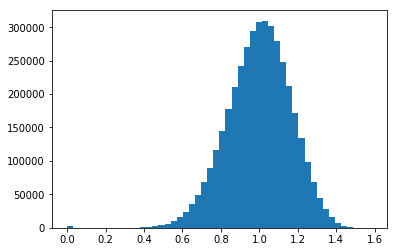

In [63]:
#Looking at the computed values for both data exploration and to be more confident about the correctness of the computation 
#Displaying the histogram of the distances

plt.hist(distances.reshape(-1), bins=50);

In [64]:
#As there are 2000 tracks, there should be at least 2000 zeros
#Confirming we have at least 2000 zeros

print('{} distances equal exactly zero.'.format(np.sum(distances == 0)))

2000 distances equal exactly zero.


In [65]:
#We convert that distance in weights, using the weighting method seen in tutorial 2: build a graph from features

kernel_width = distances.mean()
weights = np.exp(-1*(distances**2/(kernel_width**2)))

#Setting the diagonal to zero as we do not want self-connections

np.fill_diagonal(weights, 0)

#Confirming that now the diagonal is zeros

print(weights)

[[0.         0.70616672 0.30241744 ... 0.27878264 0.36627447 0.2534076 ]
 [0.70616672 0.         0.37568995 ... 0.41237095 0.35985037 0.36642685]
 [0.30241744 0.37568995 0.         ... 0.40468116 0.35045011 0.33785854]
 ...
 [0.27878264 0.41237095 0.40468116 ... 0.         0.47006966 0.71177042]
 [0.36627447 0.35985037 0.35045011 ... 0.47006966 0.         0.55077882]
 [0.2534076  0.36642685 0.33785854 ... 0.71177042 0.55077882 0.        ]]


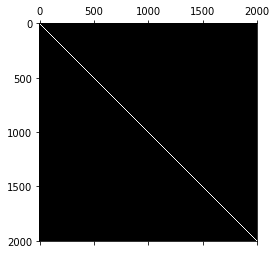

In [66]:
#So we have created a fully connected graph earlier
#But for our network to be more efficient, we want to sparsify it. We keep the k strongest edges for each node 
# We Want to visualize both the previous (fully connected) network and the new (sparsified) network

#Plotting first the fully connected network

plt.spy(weights)

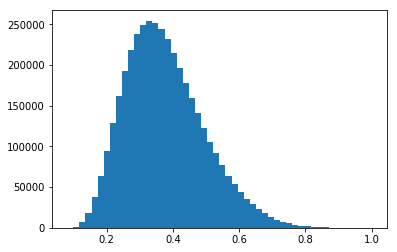

In [68]:
#Displaying the histogram of the distances before sparsifying

plt.hist(weights[weights > 0].reshape(-1), bins=50);

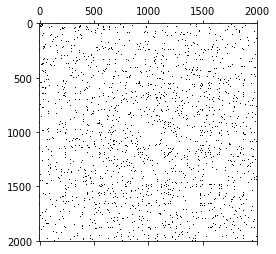

In [69]:
#Keeping 50 strongest edges for each node for sparsifying
#Tested 10, 50, 100 strongest edges but believe 50 edges is a decent number

Edges = 50

#Using np.argsort to sort the weights

sort_index = np.argsort(weights, axis = 0)

#Leaving all but the 50 strongest edges

for i,j in enumerate (sort_index):
    weights[sort_index[:-Edges,i],i] = 0
    
# We add the matrix to its transpose to make it undirected (further explanation in question 2)
    
weights = np.where(weights - weights.T == 0, weights, weights + weights.T)

plt.spy(weights)

np.save('weights.npy', weights)

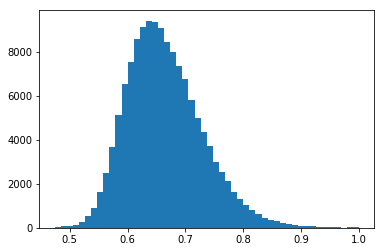

In [70]:
#Displaying the histogram of the distances after sparsifying

plt.hist(weights[weights > 0].reshape(-1), bins=50);

In [73]:
degrees1 = weights.sum(axis=0)
print(type(degrees1))
print(np.size(degrees1))
print(degrees1)

<class 'numpy.ndarray'>
2000
[38.79135544 32.63643572 30.96332191 ... 39.69033871 55.86091952
 38.86925778]


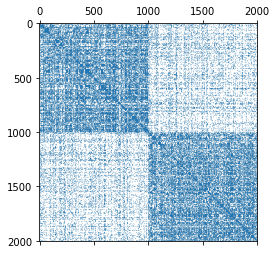

In [74]:
#Since we took only hip-hop and rock
#We expect more connections (or shorter distances) between all hip-hop tracks and between all rock tracks
#Thus in order to visualize this aspect we create another numpy array but sort/arrange it with the top being hip-hop followed by rock

Arranged = np.concatenate([np.where(tracks['track','genre_top'] == 'Hip-Hop')[0], np.where(tracks['track','genre_top'] != 'Hip-Hop')[0]])

#Arranging the weights

weights_arranged = weights[Arranged[:, np.newaxis],Arranged]

#Plotting the arranged weights 

plt.spy(weights_arranged, markersize=0.05)

In [75]:
print(type(weights_arranged))
print(np.size(weights_arranged))
print(weights_arranged)

<class 'numpy.ndarray'>
4000000
[[0.         0.70616672 0.         ... 0.         0.         0.        ]
 [0.70616672 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.66470484]
 [0.         0.         0.         ... 0.         0.66470484 0.        ]]


In [26]:
# Adjacency matrix and nodes

adjacency = weights_arranged # the adjacency matrix
n_nodes = len(adjacency) # the number of nodes in the network

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

Text(0.5, 1.05, 'adjacency matrix')

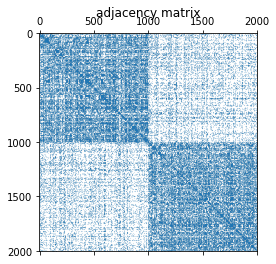

In [27]:
#Ploting the adjacency matrix

plt.spy(adjacency, markersize = 0.05)
plt.title('adjacency matrix')

### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [28]:
#Max number of links is attained when all nodes are connected between each other

Lmax = n_nodes * (n_nodes-1) * 0.5
print ('Lmax =', Lmax)

L = np.count_nonzero(adjacency) / 2
print ('L =', L)

Lmax = 1999000.0
L = 69485.0


**Number of links**: Since L << Lmax the graph is quite sparse. The sparsity however, depends on the conditions that we previously chose of keeping just the strongest connections for each of the nodes, getting rid of the rest of connections, which are weaker.

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

**Your answer here.**

In [29]:
# Code returning the answer to the question directed or undirected 

if np.array_equal(adjacency, adjacency.T):
    print('Our graph is undirected')
else:
    print('Our graph is directed')

Our graph is undirected


Indeed, we decided that the graph would be undirected. From the beginning, the graph was undirected when we compute the distance. However, once we did the sparsity of the graph selecting the strongest 50 edges for each node, the graph became directed. Finally, after this operation, we decided to add the matrix to its transpose to make the final matrix for this assignment undirected.

### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [30]:
#Saving the adjacency matrix

np.save('adjacency.npy', adjacency)

#Saving the features csv

features.to_csv('features_milestone_1.csv', sep=',', encoding='utf-8')

### Question 4

Are the edges of your graph weighted?

**Weighted edges:** Yes, they are because we converted distances to weights and distances between two songs are different depending on their features.

### Question 5

What is the degree distibution of your network? 

In [31]:
#First we compute the degree of each node, by summing up the weights assiciated with each node

degree_mat = np.copy(adjacency)
degree_mat[degree_mat != 0] = 1
degree_mat = [np.sum(e) for e in degree_mat.T]

In [32]:
#It should be a numpy array

degree =  degree_mat 
assert len(degree) == n_nodes

Execute the cell below to see the histogram of the degree distribution.

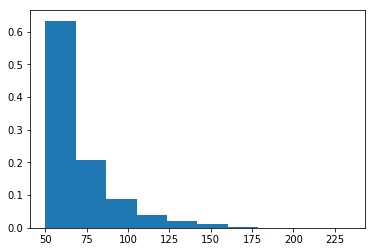

In [33]:
plt.hist(degree, weights = weights);

**Note:** As we expected, 50 (the number of strongest connections that we chose) is the minimum degree in the graph and we get a average degree higher than 50. This is normal because each song is connected with its 50 strongest connections, but it can also be connected to other songs if it belongs to the list of the 50 strongest connections of those songs (those extra connections appeared when we made the graph undirected).

What is the average degree?

In [34]:
#Calculating the average degree

average_degree = np.average(degree)
print('The average degree is', average_degree)

The average degree is 69.485


### Question 6

Comment on the degree distribution of your network.

The degree distribution depends on the condition used to sparsify the network (Edges = 50) and also it depends on the level of symmetry of the adjacency matrix. (See note above in Question 5)

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

In [35]:
def connected_graph(adjacency):
  #A connected (undirected) graph is a graph where any two vertices can be joined by a path.    
    edges = []
    for i in range(0, len(adjacency)):
        edges.append(set(np.nonzero(adjacency[i])[0])) #edges contains the indices of connections of each node
    nodes = list(range(len(adjacency))) #nodes contains a rising list of indeces of each node
    graph = {n:e for n,e in zip(nodes,edges)} #contains nodes and edges

    start = 0
    stack = [start]
    visited = set()

    while stack: 
        vertex = stack.pop() #pop() removes and returns last object or obj from the list
        if vertex not in visited:
            visited.add(vertex) 
            stack.extend(graph[vertex]- visited)
                
    if len(visited) == len(adjacency):
        connected = True
    else:
        connected = False
    
    return connected

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [36]:
#Computing if the graph is connected (True if connected, False if not connected)

connected_graph(adjacency)

True

### Question 8

Write a function that extracts the connected components of a graph.

In [37]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    ## Masking Weighted Adjacency to convert to Adjacency with 0 or 1 values
    adjacency[adjacency!=0] = 1
    
    # Converting Adjacency matrix to Adjacency list
    edges = []
    for i in range(0, len(adjacency)):
        edges.append(set(np.nonzero(adjacency[i])[0]))
    nodes = list(range(len(adjacency)))
    graph = {n:e for n,e in zip(nodes,edges)}
    
    # Initializing variables
    components = []
    start = 0
    stack = [start]
    visited = set()
    visited_tot = set()
    
    # While stack is not empty, find different components
    while stack: 
        # While stack is not empty, find nodes in the same components
        while stack:
            # choose the last node in stack as vertex
            vertex = stack.pop()
            # Check whether vertex is not visited
            if vertex not in visited:
                # add vertex to visited list
                visited.add(vertex)
                # change stack to what is no visited yet
                stack.extend(graph[vertex]- visited)
        # Filtering adjacency matrix with the visited list to get the adjacency matrix for sub-components
        adjacency_filtered = np.take(adjacency, [list(visited), list(visited)])
        # Appending adjacency matrix of sub-components to components list
        components.append(adjacency_filtered)
        
        # Update total nodes that are being visited (for ending the outer while loop)
        visited_tot.update(visited)
        
        # Itinialize stack and visited set again
        stack =[]
        stack.extend(set(nodes) - visited_tot)
        visited = set()
    
    return components

How many connected components is your network composed of? What is the size of the largest connected component? Run the find_components function to determine your answer.

In [38]:
# Printing the number of components
print(len(find_components(adjacency)), 'number of components')

#Printing the components
find_components(adjacency)

1 number of components


[array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])]

### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [39]:
def compute_shortest_path_lengths(adjacency, start):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """
    ## Preprocessing
    edges = []
    for i in range(len(adjacency)):
        edges.append(set(np.nonzero(adjacency[i])[0]))
    nodes = list(range(len(adjacency)))
    graph = {n:e for n, e in zip(nodes, edges)}
    
    # initializations for the Dijkstra Algorithm
    visited = set()
 
    # Shortest_distance contains the shortest distances from start (current), to other nodes 
    ## Initialization for every vertex to have a path of infinity. We use np.inf as infinity
    shortest_distance = dict.fromkeys(list(graph.keys()), np.inf)
    previous_node = dict.fromkeys(list(graph.keys()), None)

    # then we set the path length of the start vertex to 0
    shortest_distance[start] = 0

    # while we haven't visited all the nodes
    while visited != set(graph.keys()):
        # The closest node that has not been visited (it will begin at 'start'_
        closest_node = min((set(shortest_distance.keys()) - visited), key=shortest_distance.get)

        # for each neighbor of closest_node not in 'Visited'
        for neighbor in set(graph[closest_node]) - visited:
            new_path = shortest_distance[closest_node] + 1

            # is the new path from neighbor through closest_node smaller path 
            if new_path < shortest_distance[neighbor]:
                # since it's optimal, update the shortest path for neighbor
                shortest_distance[neighbor] = new_path

                # set the previous node of neighbor to closest_node
                previous_node[neighbor] = closest_node
        visited.add(closest_node)

    return (list(shortest_distance.values()))

In [40]:
print(compute_shortest_path_lengths(adjacency, 1))

[1, 0, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 1, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 1, 

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

**Note:** We used two different approaches to compute the diameter of the graph. 

The first approach below is the fastest one and works correctly for the whole adjacency matrix of 2000,2000. 

The second approach is much more meticulous, but requires much more time of calculation (20-30min for 2000,2000 matrix). Therefore, for this second approach, we decided to create a reduce matrix with 1000 random nodes which takes less calculation time (4min). 

In [41]:
## FIRST APPROACH FOR DIAMETER CALCULATION: Fast Randomized algorithm

def diameter_graph(adjacency):
    # Initializing diameter length
    diameter_final = 0
    
    # For i in [0, len(adjacency)/100]
    for i in range(int(len(adjacency)/100)):
        # Initializing variable
        diameter = -1
        max_dis = 0
        # Random assignment of the starting node
        start = np.random.randint(low = 0, high = len(adjacency), size=1)[0]
        
        # while we find a distance greater that previously calculated diameter
        while max_dis > diameter:
            # Assign new calculated distance to diameter
            diameter = max_dis
            # Compute all shortest distances to the "start"
            distance_list = compute_shortest_path_lengths(adjacency, start)
            # Finding the maximum shortest distance from the "start"
            max_dis = max(distance_list)
            # Assign next starting point to the most distant node
            start = distance_list.index(max(distance_list))
        # If computed diameter from newly randomized starting point is greater than previously calculated diameter
        if diameter > diameter_final:
            diameter_final = diameter       
    return diameter_final #return diameter

In [42]:
print('The diameter of the graph is ', diameter_graph(adjacency))

The diameter of the graph is  4


In [43]:
## SECOND APPROACH FOR DIAMETER CALCULATION: Searching for all the nodes shortest distance

#Computing the diameter of the graph 

#Here we create a smaller adjacency matrix with 1000 random raws(and columns)
#We did a while loop and used a set to make sure that we don't get the same raw twice
node=set()
while len(node)<1000:
    rdm_v=np.random.randint(low=0,high=1999)
    node.add(rdm_v)
node=list(node)

# Filtering the adjacency matrix to get the small adjacency with the random raws
adj_small=adjacency[node,:]
adj_small=adj_small[:,node]
# Initializing
M = 0
# For all nodes in filtered adjacency matrix
for i in range(0, len(adj_small)):
    # Compute the maximum shorted distance from node i
    MAX = max(compute_shortest_path_lengths(adj_small,i))
    # Replace newly computed MAX if it's larger than M (maximum shorted path from previous node)
    if MAX > M:
        M = MAX
print('Diameter of the graph is', M)


# If there are not enough connections in the graph (depending on the sparsity chosen by the number of strongest edges 
# when we defined the adjacency matrix), the network represented by this reduced matrix might be not connected so we
# should make sure the connections are enough to get connected reduced matrices.

Diameter of the graph is 4


### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [44]:


def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    # Masking weighted adjacency matrix to convert it to adjacency matrix
    adjacency[adjacency != 0] = 1
    
    #As seen in class, we can compute adjacency matrix power the length to get the number of paths between two nodes i and j.
    n_paths = np.linalg.matrix_power(adjacency,length)[source,target]
    
    
    return n_paths

Test your function on 5 pairs of nodes, with different lengths.

In [45]:
print(compute_paths(adjacency, 0, 10, 1))
print(compute_paths(adjacency, 0, 10, 2))
print(compute_paths(adjacency, 0, 10, 3))
print(compute_paths(adjacency, 23, 67, 2))
print(compute_paths(adjacency, 15, 93, 4))

0.0
0.0
115.0
5.0
31287.0


### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

In [46]:
#Again we calculate the matrix of the power of 3 of the adjacency matrix
S = np.linalg.matrix_power(adjacency, 3)

#Then we have to add all elements of the lower or upper triangular matrix (since adjacency matrix is symetrical) 
#to get the total number of paths of length 3.

#Here we decided to remove diagonal, this means that the paths of length 3 that go from one node to the same node are not accounted
NumberOfPaths1 = (np.sum(S)-np.trace(S))/2

#Here we take into account the paths of length 3 that go from one node to the same node
NumberOfPaths2 = (np.sum(S)-np.trace(S))/2 + np.trace(S) 


#Printing first option (considering only node to the same node once)
print(NumberOfPaths1, 'number of paths of lenght 3')

#NOTE: since our graph is undirected, we decided not to count twice a same path that goes from A to B
#and from B to A, that's why we divided the number of path by 2 in our calculations

407073316.0 number of paths of lenght 3


### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [47]:
def compute_clustering_coefficient(adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """
    
    # Computing the clustering coefficient
    
    L = 0
#Double loop to test all the pairs of nodes that are connected to 1 and test if they are connected to each other
    for i in np.nonzero(adjacency[node])[0]: 
        for j in np.nonzero(adjacency[node])[0]:
            if adjacency[i,j] != 0:
                 L = L + 1 #We create L by incrementing it everytime 2 neighbours are connected
    
    L = L / 2 #Because we counted both ways (from A to B and from B to A)
    k = len(np.nonzero(adjacency[node])[0]) #k is just the number of neighbours 
    clustering_coefficient = 2*L / (k*(k-1))  #we finally have the final clustering coefficient thanks to the formula seen in class
    return clustering_coefficient

In [48]:
print(np.nonzero(adjacency[1])[0])
print('Clustering coefficient is',compute_clustering_coefficient(adjacency, 1))

[   0   11   13   15   16   20   32  101  105  107  156  290  302  332
  336  350  375  376  413  456  458  529  540  541  568  581  588  649
  651  667  691  727  732  764  784  798  912  920  957  958  960  966
  971  972  974  976  984  987 1018 1354 1592 1704 1967]
Clustering coefficient is 0.21770682148040638


### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [49]:
# Computing the average clustering coefficient
a = []
for node in range(0, len(adjacency)):
    a.append(compute_clustering_coefficient(adjacency, node))

average_clustering_coefficient = sum(a)/len(a) 
print('The average clustering coefficient is', average_clustering_coefficient)

The average clustering coefficient is 0.24606059783787942
